# 資料探索

我們先載入這個章節範例程式碼中會使用到的第三方套件、模組或者其中的部分類別、函式。

In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from tensorflow.keras import datasets

## 關於 Matplotlib

Matplotlib 是 Python 實踐資料視覺化的核心套件，建構於 NumPy 所提供的 `ndarray` 陣列類別與 SciPy 框架之上，於 2002 年由 John Hunter 構思出作為 IPython 的一環，以類似 Matlab 的語法和樣式來作圖，Matplotlib 套件在 2003 年發佈 0.1.0 版，它相當幸運地在早期階段就被哈伯太空望遠鏡團隊採用作為繪圖軟體，也因為獲得了強而有力的財務支援，在功能和規模開展的過程顯得相當順遂。Matplotlib 主打強項是支援多種主流作業系統、繪圖後端引擎與輸出格式，這使得它成為軟體工程師或資料分析師的生態圈中不可或缺的第三方套件。我們可以執行 Python 的載入指令（`import`）後印出 Matplotlib 的版本號來確認環境中是否安裝了 Matplotlib 可供使用。

In [2]:
print(mpl.__version__)

3.2.0


假若得到的回應是：

```
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ModuleNotFoundError: No module named 'matplotlib'
```

表示目前所處的 Python 環境沒有安裝 Matplotlib，這時要切換回命令列安裝。

```bash
# 在命令列執行
pip install matplotlib
```

## 為何 Matplotlib

近幾年在資料視覺化（Data Visualization）、商業智慧（Business Intelligence）與資訊視覺圖表（Infographics）等熱門應用領域的推波助瀾之下，視覺化套件的介面設計有了長足進展，新興競爭者如 R 語言的 ggplot2、建構於網頁的 D3.js 與不需寫程式的 Tableau/PowerBI 讓 Matplotlib 顯得有些老態龍鍾，不過在其龐大的使用者社群中，仍然有依賴於它的套件如雨後春筍般誕生，像廣受歡迎於 ggplot2 設計理念相似的 Seaborn，持續為 Matplotlib 的繪圖生態系注入生命力。

固然新興套件在外觀、介面友善程度上有很大的優勢，不過諸如 ggplot2、Seaborn 或 plotly 在作圖時的出發點都採用資料框（`DataFrame`）物件，這點與 Matplotlib 只要從數值陣列就可以作圖，相較之下顯得略微遲緩一些，再者由於新興套件的定位屬於更為高階，在客製化使用程度上略遜定位於低階的 Matplotlib，因此本書依舊選擇 Matplotlib 作為入門機器學習的輔助，這點也與多數的機器學習工程師、資料科學家符合。

## 使用 Matplotlib 的兩種方式

對一開始接觸 Matplotlib 使用者最大挑戰是它的兩種作圖語法風格：

1. Matlab 風格
2. 物件導向風格

我們繪製一個排版外觀 2x1 的畫布呈現這兩種不同的作圖語法風格。首先是 Matlab 風格，對本來就利用 Matlab 作資料分析的使用者非常熟稔，它採用靜態模式介面（Stateful interface），`plt` 物件可以指向當下建構出的圖形（gcf, get current figure）與軸（gca, get current axis），如以下範例所示。

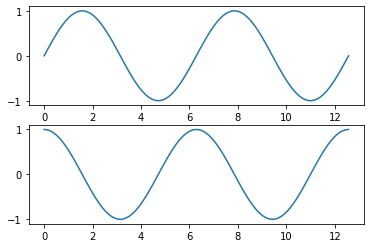

In [3]:
# Matlab 風格
x = np.linspace(0, np.pi*4, 100)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(x, np.sin(x))
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))
plt.show()

第二種是物件導向風格，我們在作圖之前必須分別宣告 `fig` 與 `ax` 兩個物件，然後再呼叫個別方法，繪製出與上述相同排版外觀的作圖結果。由於在未來將常遭遇繪製排版外觀 `m x n` 的畫布，因此我們將主要使用「物件導向風格」來繪製 Matplotlib 的圖形。

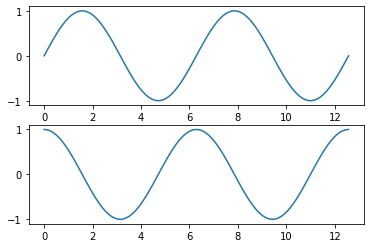

In [4]:
# 物件導向風格
fig, axes = plt.subplots(2, 1)
axes[0].plot(x, np.sin(x))
axes[1].plot(x, np.cos(x))
plt.show()

## 輸出 Matplotlib 作圖

當我們希望將作圖結果輸出為圖片，可以使用 `fig.savefig()` 存為圖檔，Matplotlib 支援的格式可以經由 `fig.canvas.get_supported_filetypes()` 得知。

In [5]:
fig = plt.figure()
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 432x288 with 0 Axes>

將剛才以物件導向風格繪製的圖以常見的 png 格式輸出，讀者可以在 Jupyter Notebook 的工作目錄找到 my_figure.png。

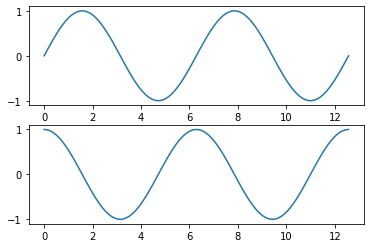

In [6]:
fig, axes = plt.subplots(2, 1)
axes[0].plot(x, np.sin(x))
axes[1].plot(x, np.cos(x))
fig.savefig('my_figure.png')

In [7]:
 # 讀者可以在 Jupyter Notebook 的工作目錄找到 my_figure.png
for file in os.listdir():
    if '.png' in file:
        print(file)

my_figure.png


## 常見的探索性資料分析

在物件導向風格的作圖語法中，不論繪製任何類型的圖形，都要先宣告兩個物件：「畫布」與「軸物件」，其中「畫布」以 `plt.figure()` 創建，「軸物件」以 `plt.axes()` 創建；如果要在一個畫布上面繪製多個圖形，那麼這兩個物件可以同時用 `plt.subplots()` 創建；接著再依照圖形種類，呼叫座標物件不同的作圖方法。這裡將作圖流程摘要：

- 將資料整理為 `ndarray` 格式
- 展開「畫布物件」與「軸物件」
- 依照探索需求呼叫「軸物件」的作圖方法
- 依照設計需求添加「軸物件」的元素
- 呼叫 `plt.show()` 顯示圖形

接著我們會從常見的探索性資料分析需求著手，檢視該如何用物件導向風格繪製。

## 觀察數值資料相關性的需求

我們使用散佈圖（Scatter plot）用作探索兩組數值資料相關情況，藉著圖形可以觀察兩組數值資料之間是否有負相關、正相關或者無相關之特徵。呼叫 `ax.scatter()` 再依序傳入 X 軸、Y 軸的數列就完成繪圖。

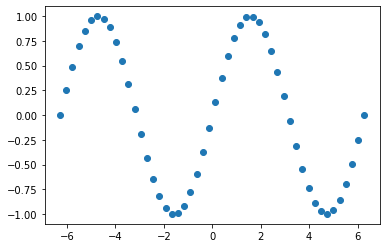

In [8]:
x = np.linspace(-2*np.pi, 2*np.pi)
f = np.sin(x)
fig = plt.figure()
ax = plt.axes()
ax.scatter(x, f)
plt.show()

## 觀察類別資料排序的需求

我們使用長條圖（Bar plot）用作探索類別資料排序情況之圖形，藉著圖形可以一目瞭然哪個類別的摘要數值最高、最低。呼叫 `ax.bar()` 傳入和摘要相同長度的 X 軸位置數列與摘要數列就能完成繪圖。

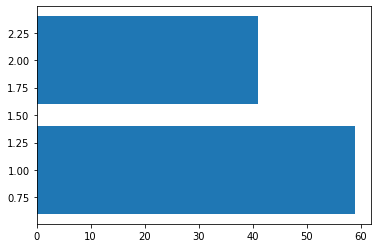

In [9]:
np.random.seed(42)
random_integers = np.random.randint(1, 100, size=100)
n_odds = np.sum(random_integers % 2 == 0)
n_evens = np.sum(random_integers % 2 == 1)
y = np.array([n_odds, n_evens])
x = np.array([1, 2])
fig = plt.figure()
ax = plt.axes()
ax.barh(x, y)
plt.show()

## 觀察數值資料分佈的需求

我們使用直方圖（Histogram plot）用作探索數值資料分佈情況之圖形，藉著圖形可以一目瞭然數值是左傾（Left-skewed）、右傾（Right-skewed）或者其餘的外觀。呼叫 `ax.hist()` 傳入數列就能完成繪圖。

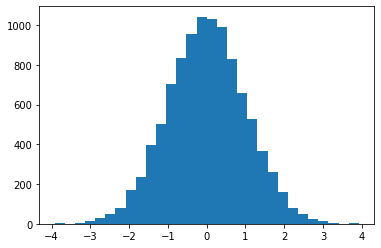

In [10]:
arr = np.random.normal(size=10000)
fig = plt.figure()
ax = plt.axes()
ax.hist(arr, bins=30)
plt.show()

## 觀察數學函式外觀的需求

我們使用線圖（Line plot）用作探索數學函式外觀之圖形，藉著圖形可以一目瞭然函式在某個區間的外觀，遠比在腦海中想像公式還要具體。呼叫 `ax.plot()` 依序放置輸入數學函式的數列、數學函式輸出的數列就能完成繪圖。

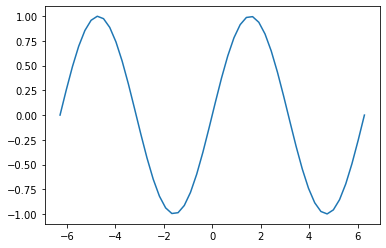

In [11]:
x = np.linspace(-2*np.pi, 2*np.pi)
f = np.sin(x)
fig = plt.figure()
ax = plt.axes()
ax.plot(x, f)
plt.show()

## 觀察區域海拔高度的需求

我們使用等高線圖（Contour plot）或填滿等高線圖（Contour-filled plot）用作區域海拔高度變化之圖形。呼叫 `ax.contour()` 或 `ax.contourf()` 依序放置經度、緯度與海拔高度的二維陣列就能完成繪圖。

在機器學習的視覺化中常會以模型係數做為經緯度，以誤差函式做為海拔高度，藉此觀察不同係數組合對應的誤差函式大小。在以下的式子中讀者可以將 $X$ 與 $Y$ 想像是模型係數，$Z$ 是每組係數組合所對應的誤差。

\begin{equation}
Z = 2 (e^{-X^{2} - Y^{2}} - e^{-(X-1)^2 - (Y-1)^2})
\end{equation}

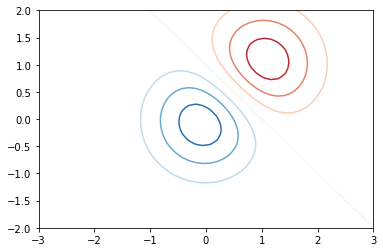

In [12]:
x = np.linspace(-3.0, 3.0)
y = np.linspace(-2.0, 2.0)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2
fig = plt.figure()
ax = plt.axes()
ax.contour(X, Y, Z, cmap='RdBu')
plt.show()

填滿等高線圖（Contour-filled plot）在機器學習的視覺化中另外用途是決策邊界（Decision boundary）的呈現，常搭配散佈圖來描述資料特徵與類別預測之間的關聯。

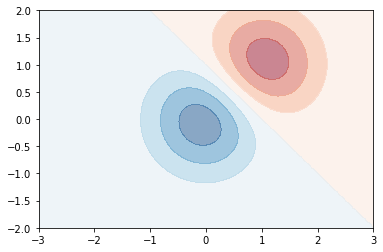

In [13]:
fig = plt.figure()
ax = plt.axes()
ax.contourf(X, Y, Z, alpha=0.5, cmap='RdBu')
plt.show()

## 顯示二維數值陣列的需求

一張解析度為 $w \times h$ 的灰階圖片可以用一個外觀 `(w, h)` 的二維數值陣列來表示圖片中 $w \times h$ 個點的像素（Pixel）強度，而呼叫 `ax.imshow()` 可以將其顯示成為圖片，以著名的手寫數字資料集 [MNIST](http://yann.lecun.com/exdb/mnist/) 為例，每張手寫數字圖片都是 `(28, 28)` 外觀的二維數值陣列、共 784 個像素。

In [14]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data(path="mnist.npz")
first_picture = X_train[0, :, :]
first_picture.shape

(28, 28)

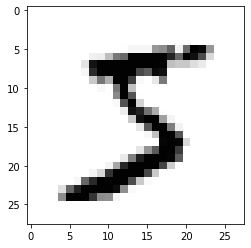

In [15]:
fig = plt.figure()
ax = plt.axes()
ax.imshow(first_picture, cmap='Greys')
plt.show()

## 如何為圖形添加元素

有時我們會需要標題、軸標籤或者其他元素，來讓讀者能更快理解圖形的內涵。常用的圖形元素有：

- 標題
- 軸標籤
- 刻度標籤
- 文字
- 圖例或數值說明

利用軸物件的 `set_title()` 方法可以加入標題。

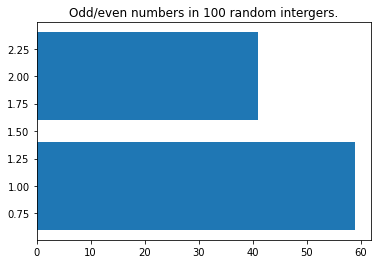

In [16]:
np.random.seed(42)
random_integers = np.random.randint(1, 100, size=100)
n_odds = np.sum(random_integers % 2 == 0)
n_evens = np.sum(random_integers % 2 == 1)
y = np.array([n_odds, n_evens])
x = np.array([1, 2])
fig = plt.figure()
ax = plt.axes()
ax.barh(x, y)
ax.set_title("Odd/even numbers in 100 random intergers.")
plt.show()

利用軸物件的 `set_xlabel()` 與 `set_ylabel()` 方法分別加入 X 軸與 Y 軸標籤。

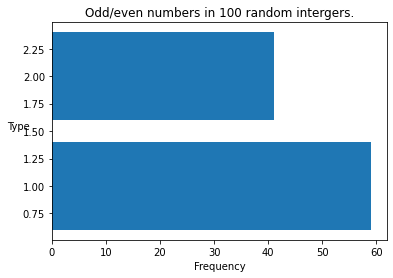

In [17]:
fig = plt.figure()
ax = plt.axes()
ax.barh(x, y)
ax.set_title("Odd/even numbers in 100 random intergers.")
ax.set_xlabel("Frequency")
ax.set_ylabel("Type", rotation=0) # 指定 Y 軸標籤的角度
plt.show()

利用軸物件的 `set_xticks()`、`set_xticklabels()`、`set_yticks()` 與 `set_yticklabels()` 方法分別加入 X 軸與 Y 軸標籤刻度。

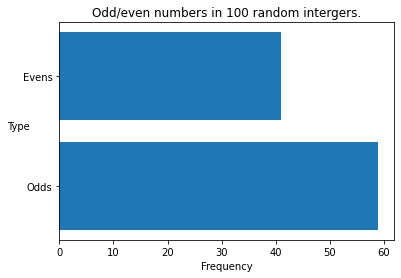

In [18]:
fig = plt.figure()
ax = plt.axes()
ax.barh(x, y)
ax.set_title("Odd/even numbers in 100 random intergers.")
ax.set_xlabel("Frequency")
ax.set_ylabel("Type", rotation=0) # 指定 Y 軸標籤的角度
ax.set_yticks([1, 2])
ax.set_yticklabels(['Odds', 'Evens'])
plt.show()

利用軸物件的 `set_xlim()` 與 `set_ylim()` 方法調整圖形的 X 軸和 Y 軸的上下限。

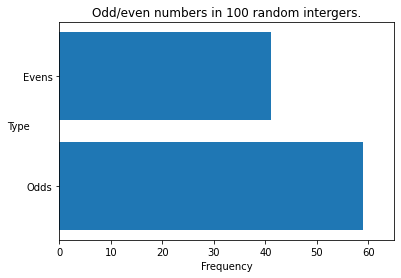

In [19]:
fig = plt.figure()
ax = plt.axes()
ax.barh(x, y)
ax.set_title("Odd/even numbers in 100 random intergers.")
ax.set_xlabel("Frequency")
ax.set_ylabel("Type", rotation=0) # 指定 Y 軸標籤的角度
ax.set_yticks([1, 2])
ax.set_yticklabels(['Odds', 'Evens'])
ax.set_xlim(0, 65)
plt.show()

利用軸物件的 `text()` 方法為圖形添加文字說明。

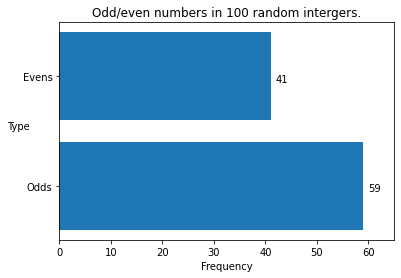

In [20]:
fig = plt.figure()
ax = plt.axes()
ax.barh(x, y)
ax.set_title("Odd/even numbers in 100 random intergers.")
ax.set_xlabel("Frequency")
ax.set_ylabel("Type", rotation=0) # 指定 Y 軸標籤的角度
ax.set_yticks([1, 2])
ax.set_yticklabels(['Odds', 'Evens'])
ax.set_xlim(0, 65)
for xi, yi in zip(x, y):
    ax.text(yi + 1, xi - 0.05, "{}".format(yi))
plt.show()

圖例能夠以軸物件的 `legend()` 方法搭配作圖時的 `label` 參數創建。

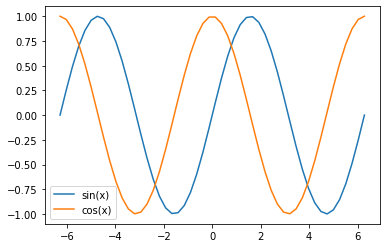

In [21]:
x = np.linspace(-2*np.pi, 2*np.pi)
f = np.sin(x)
g = np.cos(x)
fig = plt.figure()
ax = plt.axes()
ax.plot(x, f, label="sin(x)")
ax.plot(x, g, label="cos(x)")
ax.legend()
plt.show()

特定圖形例如等高線圖（Contour plot）可以在等高線上加入海拔高度數值說明數字；填滿等高線圖（Contour-filled plot）可以加入海拔高度數值說明色條。

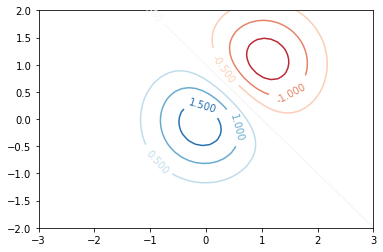

In [22]:
x = np.linspace(-3.0, 3.0)
y = np.linspace(-2.0, 2.0)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2
fig = plt.figure()
ax = plt.axes()
CS = ax.contour(X, Y, Z, cmap='RdBu')
ax.clabel(CS, inline=1, fontsize=10)
plt.show()

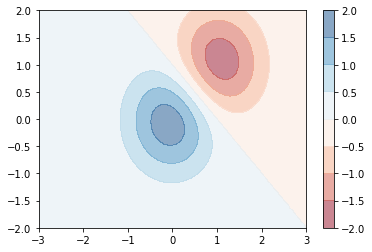

In [23]:
fig = plt.figure()
ax = plt.axes()
CS = ax.contourf(X, Y, Z, alpha=0.5, cmap='RdBu')
fig.colorbar(CS)
plt.show()

## 如何在圖形中加入中文字

中文的使用者在為圖形添加元素時會碰上中文無法顯示生成為空格的問題，這是因為 matplotlib 預設的字體不支援中文，解決方式是另外指定支援中文的字體，例如 macOS 常用的細黑體（STHeiti Light.ttc）或者 Windows 常用的微軟正黑體（msjh.ttf），透過 `matplotlib.font_manager` 所提供的 `FontProperties()` 函式傳入能夠支援繁體中文字體的檔案路徑。

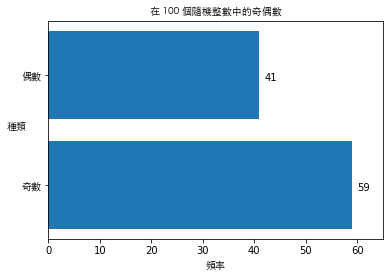

In [24]:
font_path = "/System/Library/Fonts/STHeiti Light.ttc" # Windows 使用者可以指定 C:/Windows/Fonts/msjh.ttf
font_path = "STHeiti Light.ttc" # 如果在雲端主機執行 Jupyter Notebook 需要置放支援中文的字體於工作目錄
tc_font = FontProperties(fname=font_path)
np.random.seed(42)
random_integers = np.random.randint(1, 100, size=100)
n_odds = np.sum(random_integers % 2 == 0)
n_evens = np.sum(random_integers % 2 == 1)
y = np.array([n_odds, n_evens])
x = np.array([1, 2])
fig = plt.figure()
ax = plt.axes()
ax.barh(x, y)
ax.set_title("在 100 個隨機整數中的奇偶數", fontproperties=tc_font)
ax.set_xlabel("頻率", fontproperties=tc_font)
ax.set_ylabel("種類", rotation=0, fontproperties=tc_font) # 指定 Y 軸標籤的角度
ax.set_yticks([1, 2])
ax.set_yticklabels(['奇數', '偶數'], fontproperties=tc_font)
ax.set_xlim(0, 65)
for xi, yi in zip(x, y):
    ax.text(yi + 1, xi - 0.05, "{}".format(yi))
plt.show()

## 如何繪製子圖

子圖（subplots）是資料科學經常採用的技巧，藉由將視覺化在同一個畫布上並列呈現，進而輕鬆地比較組別之間的差別，這時可以改用 `plt.subplots(m, n)` 同時創建畫布物件和 $m \times n$ 個軸物件，多個軸物件會擺置在一個外觀 `(m, n)` 的 `ndarray`。

<class 'numpy.ndarray'>
(3, 5)


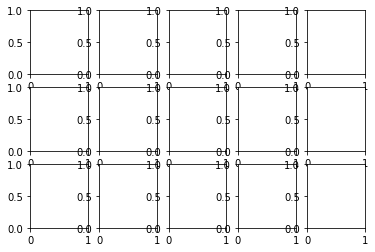

In [25]:
fig, axes = plt.subplots(3, 5)
print(type(axes))
print(axes.shape)

接著就能夠像索引數值陣列中的數值一般，運用 `[m, n]` 的語法對位於 `[m, n]` 位置的軸物件呼叫作圖方法或者添加元素。

In [26]:
class ImshowSubplots:
    """
    This class plots 2d-arrays with subplots.
    Args:
        rows (int): The number of rows of axes.
        cols (int): The number of columns of axes.
        fig_size (tuple): Figure size.
    """
    def __init__(self, rows, cols, fig_size):
        self._rows = rows
        self._cols = cols
        self._fig_size = fig_size
    def im_show(self, X, y, label_dict=None):
        """
        This function plots 2d-arrays with subplots.
        Args:
            X (ndarray): 2d-arrays.
            y (ndarray): Labels for 2d-arrays.
            label_dict (dict): Str labels for y if any.
        """
        n_pics = self._rows*self._cols
        first_n_pics = X[:n_pics, :, :]
        first_n_labels = y[:n_pics]
        fig, axes = plt.subplots(self._rows, self._cols, figsize=self._fig_size)
        for i in range(n_pics):
            row_idx = i % self._rows
            col_idx = i // self._rows
            axes[row_idx, col_idx].imshow(first_n_pics[i], cmap="Greys")
            if label_dict is not None:
                axes[row_idx, col_idx].set_title("Label: {}".format(label_dict(first_n_labels[i])))
            else:
                axes[row_idx, col_idx].set_title("Label: {}".format(first_n_labels[i]))
            axes[row_idx, col_idx].set_xticks([])
            axes[row_idx, col_idx].set_yticks([])
        plt.tight_layout()
        plt.show()

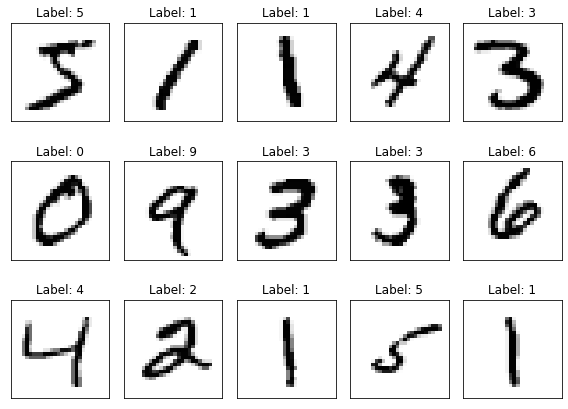

In [27]:
iss = ImshowSubplots(3, 5, (8, 6))
iss.im_show(X_train, y_train)

運用子圖顯示二維數值陣列之後還會用到，因此我們定義 `ImshowSubplots` 類別並封裝到 `pyvizml` 模組之中，後續如果還要使用它，就可以用 `from MODULE import CLASS` 的指令載入。

## 延伸閱讀

1. Tutorials - Matplotlib (https://matplotlib.org/tutorials/index.html) 
2. Visualization with Matplotlib. In: Jake VanderPlas, Python Data Science Handbook (https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html) 
3. The MNIST database of handwritten digits (http://yann.lecun.com/exdb/mnist/)